# "Building a basic Neural Network from scratch - Kudzu"

- badges: true
- author: Anshuman Gupta

#### In this project, the idea is to write a classifier to differentiate between handwritten digits 3 and 8, from the MNIST database.

#### I will using a custom built neural network library called Kudzu.This has been developed as a part of KTF/Foundations course of Univ.ai (www.univ.ai). The source code for Kudzu Library and and this notebook can be found on my git-hub profile : www.https://github.com/anshuman6 under the folder project-solution. Any feedback and comments are welcome. Please feel free to email me at: anshuman6@gmail.com

#### 1. I will be using the MNIST database. 

#### 2. I will be comparing the results of the 4 layer NN to a standard logistic regression

##### Importing all the necessary libraries

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

##### The following command helps us download MNIST from notebook itself. You can skip this if you already have MNIST. You can also download it via your terminal.

In [3]:
!pip install mnist # Please note, it is commented out for now, you can remove comment if you want to install it

You should consider upgrading via the '/opt/hostedtoolcache/Python/3.6.11/x64/bin/python -m pip install --upgrade pip' command.


#### Preparing the Data

In [4]:
import mnist

In [5]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()

In [6]:
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [7]:
test_images = mnist.test_images()
test_labels = mnist.test_labels()

In [8]:
test_images.shape, test_labels.shape

((10000, 28, 28), (10000,))

2


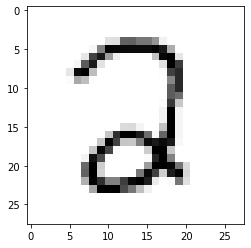

In [9]:
image_index = 7776 # You may select anything up to 60,000
print(train_labels[image_index]) 
plt.imshow(train_images[image_index], cmap='Greys')

## Filter data to get 3 and 8 out

In [10]:
train_filter = np.where((train_labels == 3 ) | (train_labels == 8))
test_filter = np.where((test_labels == 3) | (test_labels == 8))
X_train, y_train = train_images[train_filter], train_labels[train_filter]
X_test, y_test = test_images[test_filter], test_labels[test_filter]

##### We normalize the pizel values in the 0 to 1 range

In [11]:
X_train = X_train/255.
X_test = X_test/255.

And setup the labels as 1 (when the digit is 3) and 0 (when the digit is 8)

In [12]:
y_train = 1*(y_train==3)
y_test = 1*(y_test==3)

In [13]:
X_train.shape, X_test.shape

((11982, 28, 28), (1984, 28, 28))

##### We reshape the data to flatten the image pixels into a set of features or co-variates:

In [14]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
X_train.shape, X_test.shape

((11982, 784), (1984, 784))

##### Importing Kudzu library and its functionality

In [15]:
from kudzu.data import Data, Dataloader, Sampler
from kudzu.callbacks import AccCallback
from kudzu.loss import MSE
from kudzu.layer import Affine, Sigmoid
from kudzu.model import Model
from kudzu.optim import GD
from kudzu.train import Learner
from kudzu.callbacks import ClfCallback
from kudzu.layer import Sigmoid
from kudzu.layer import Relu

##### We are creating a class, just so that we can use it to store our parameters for us

In [16]:
class Config:
    pass
config = Config()
config.lr = 0.001
config.num_epochs = 250
config.bs = 50

##### Initializing Data

In [17]:
data = Data(X_train, y_train.reshape(-1,1))
loss = MSE()
opt = GD(config.lr)
sampler = Sampler(data, config.bs, shuffle=True)
dl = Dataloader(data, sampler)

##### Constructing 2 different layers, one for NN and one only for logistic regression.

##### Creating containers for data to be passed, to calculate accuracies

In [18]:
training_xdata = X_train
testing_xdata = X_test
training_ydata = y_train.reshape(-1,1)
testing_ydata = y_test.reshape(-1,1)

##### Initializing models and Running training loop: 

In [19]:
layers = [Affine("first", 784, 100), Relu("first"), Affine("second", 100, 100), Relu("second"), Affine("third", 100, 2), Affine("final", 2, 1), Sigmoid("final")]

model_neural = Model(layers)
model_logistic = Model([Affine("logits", 784, 1), Sigmoid("sigmoid")])

In [20]:
learner1 = Learner(loss, model_neural, opt, config.num_epochs)
acc1 = ClfCallback(learner1, config.bs, training_xdata , testing_xdata, training_ydata, testing_ydata)
learner1.set_callbacks([acc1])

In [21]:
learner1.train_loop(dl)

Epoch 0 Loss 0.24450984786718
train accuracy is: 0.5881321982974461, test accuracy is 0.5967741935483871


Epoch 10 Loss 0.13235728643430686
train accuracy is: 0.8869137038891671, test accuracy is 0.8986895161290323


Epoch 20 Loss 0.0701993326147908
train accuracy is: 0.928559505925555, test accuracy is 0.9410282258064516


Epoch 30 Loss 0.05080533603283597
train accuracy is: 0.9445835419796361, test accuracy is 0.9581653225806451


Epoch 40 Loss 0.042387065977513766
train accuracy is: 0.9527624770489067, test accuracy is 0.9667338709677419


Epoch 50 Loss 0.037784761696774236
train accuracy is: 0.957185778668002, test accuracy is 0.967741935483871


Epoch 60 Loss 0.0348044595499799
train accuracy is: 0.9608579535970623, test accuracy is 0.96875


Epoch 70 Loss 0.0326670756475523
train accuracy is: 0.9629444166249375, test accuracy is 0.9702620967741935


Epoch 80 Loss 0.03101187051977959
train accuracy is: 0.9646135870472375, test accuracy is 0.9702620967741935


Epoch 90 Loss 0.02967341274928311
train accuracy is: 0.9654481722583875, test accuracy is 0.9702620967741935


Epoch 100 Loss 0.028546131248280142
train accuracy is: 0.9667000500751126, test accuracy is 0.9717741935483871


Epoch 110 Loss 0.02757820330279745
train accuracy is: 0.9680353864129527, test accuracy is 0.9722782258064516


Epoch 120 Loss 0.02673191785704829
train accuracy is: 0.9685361375396428, test accuracy is 0.9727822580645161


Epoch 130 Loss 0.025974673879068093
train accuracy is: 0.9692038057085628, test accuracy is 0.9727822580645161


Epoch 140 Loss 0.025286870795195246
train accuracy is: 0.9698714738774828, test accuracy is 0.9727822580645161


Epoch 150 Loss 0.02466967460913852
train accuracy is: 0.9706226005675179, test accuracy is 0.9732862903225806


Epoch 160 Loss 0.024094729104653163
train accuracy is: 0.971206810215323, test accuracy is 0.9727822580645161


Epoch 170 Loss 0.02357396426901268
train accuracy is: 0.9725421465531631, test accuracy is 0.9717741935483871


Epoch 180 Loss 0.02308090644551474
train accuracy is: 0.9731263562009681, test accuracy is 0.9727822580645161


Epoch 190 Loss 0.022623730641700705
train accuracy is: 0.9737105658487731, test accuracy is 0.9717741935483871


Epoch 200 Loss 0.02218586327261072
train accuracy is: 0.9744616925388082, test accuracy is 0.9717741935483871


Epoch 210 Loss 0.02176969150391372
train accuracy is: 0.9753797362710733, test accuracy is 0.9722782258064516


Epoch 220 Loss 0.0213686351969307
train accuracy is: 0.9757135703555333, test accuracy is 0.9722782258064516


Epoch 230 Loss 0.020987739079304943
train accuracy is: 0.9758804873977633, test accuracy is 0.9722782258064516


Epoch 240 Loss 0.020617001801744955
train accuracy is: 0.9765481555666834, test accuracy is 0.9722782258064516


0.0067292479254144515

##### Now running only the logistic regression based classification to compare results with NN

In [22]:
learner2 = Learner(loss, model_logistic, opt, config.num_epochs)
acc2 = ClfCallback(learner2, config.bs, training_xdata , testing_xdata, training_ydata, testing_ydata)
learner2.set_callbacks([acc2])

In [23]:
learner2.train_loop(dl)

Epoch 0 Loss 0.23499119149806255
train accuracy is: 0.6919545985645135, test accuracy is 0.6824596774193549


Epoch 10 Loss 0.1039281966798495
train accuracy is: 0.9084460023368386, test accuracy is 0.9238911290322581


Epoch 20 Loss 0.08012947111277152
train accuracy is: 0.9272241695877149, test accuracy is 0.9375


Epoch 30 Loss 0.06893948620753673
train accuracy is: 0.9350692705725254, test accuracy is 0.9465725806451613


Epoch 40 Loss 0.06216757465813444
train accuracy is: 0.9399933233183108, test accuracy is 0.9526209677419355


Epoch 50 Loss 0.05754241663272324
train accuracy is: 0.943415122684026, test accuracy is 0.9546370967741935


Epoch 60 Loss 0.05414731317906321
train accuracy is: 0.9466700050075113, test accuracy is 0.9566532258064516


Epoch 70 Loss 0.05152629515736824
train accuracy is: 0.9494241362043064, test accuracy is 0.9596774193548387


Epoch 80 Loss 0.04942860461044048
train accuracy is: 0.9513436821899516, test accuracy is 0.9611895161290323


Epoch 90 Loss 0.04770181303490937
train accuracy is: 0.9519278918377566, test accuracy is 0.9627016129032258


Epoch 100 Loss 0.046248411439902284
train accuracy is: 0.9531797696544817, test accuracy is 0.9642137096774194


Epoch 110 Loss 0.04500648273432279
train accuracy is: 0.9534301452178268, test accuracy is 0.9652217741935484


Epoch 120 Loss 0.04392626249552184
train accuracy is: 0.9542647304289767, test accuracy is 0.9647177419354839


Epoch 130 Loss 0.04297590528492249
train accuracy is: 0.9550993156401268, test accuracy is 0.9667338709677419


Epoch 140 Loss 0.04213230541467081
train accuracy is: 0.9563511934568519, test accuracy is 0.9667338709677419


Epoch 150 Loss 0.04137628171351278
train accuracy is: 0.957436154231347, test accuracy is 0.9667338709677419


Epoch 160 Loss 0.040693259835836305
train accuracy is: 0.9581872809213821, test accuracy is 0.967741935483871


Epoch 170 Loss 0.04007196023400872
train accuracy is: 0.958604573526957, test accuracy is 0.967741935483871


Epoch 180 Loss 0.039504118581895266
train accuracy is: 0.9590218661325322, test accuracy is 0.967741935483871


Epoch 190 Loss 0.03898243114150344
train accuracy is: 0.9595226172592222, test accuracy is 0.967741935483871


Epoch 200 Loss 0.03850050497707005
train accuracy is: 0.9596060757803372, test accuracy is 0.967741935483871


Epoch 210 Loss 0.03805280571447929
train accuracy is: 0.9596895343014522, test accuracy is 0.9682459677419355


Epoch 220 Loss 0.03763676828302223
train accuracy is: 0.9602737439492572, test accuracy is 0.9682459677419355


Epoch 230 Loss 0.03724811723897259
train accuracy is: 0.9606910365548322, test accuracy is 0.9682459677419355


Epoch 240 Loss 0.03688397446184921
train accuracy is: 0.9609414121181773, test accuracy is 0.96875


0.055320750443549976

### Comparing results of NN and LR

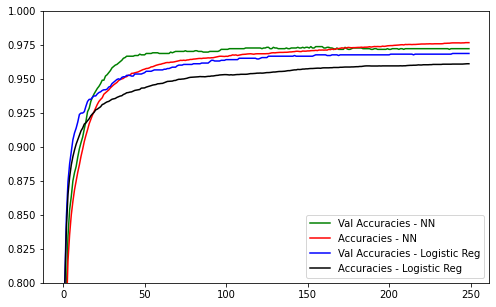

In [24]:
plt.figure(figsize=(8,5))
plt.plot(acc1.val_accuracies, 'g-', label = "Val Accuracies - NN")
plt.plot(acc1.accuracies, 'r-', label = "Accuracies - NN")
plt.plot(acc2.val_accuracies, 'b-', label = "Val Accuracies - Logistic Reg")
plt.plot(acc2.accuracies, 'k-', label = "Accuracies - Logistic Reg")
plt.ylim(0.8,1) ## for a more spread out view
plt.legend()

### Clearly NN has a better accuracy over LR; NN is overfitting - Validation accuracy (green) has dropped below training accuracy (orange), also they are diverging. This problem is not seen in LR

##### Now we will be moving through the network, till the output of the second last affine where we get a 2 dimensional output. We will be plotting this 2d output and probability contours

In [25]:
model_new = Model(layers[:-2])

In [26]:
plot_testing = model_new(testing_xdata)

##### Plotting the scatter plot of points and color coding by class

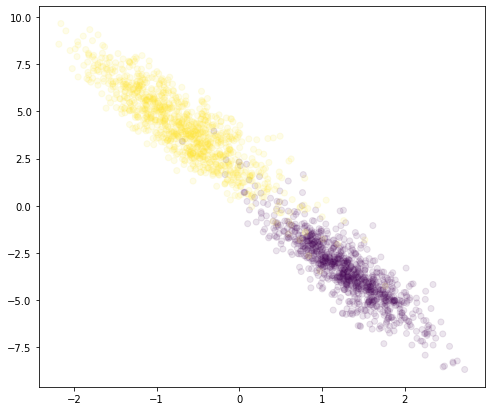

In [27]:
plt.figure(figsize=(8,7))
plt.scatter(plot_testing[:,0], plot_testing[:,1], alpha = 0.1, c = y_test.ravel());

##### Plotting probability contours

In [28]:
model_prob = Model(layers[-2:]) ## picking only last two layers to get probability. That is affine followed by sigmoid

In [29]:
xgrid = np.linspace(-4, 1, 100) ## Adjust these values based on above chart, roughly -4 to 1
ygrid = np.linspace(-7.5, 7.5, 100) ## Adjust these values based on above chart, roughly -7.5, 7.5
xg, yg = np.meshgrid(xgrid, ygrid)
# xg and yg are now both 100X100, lets convert them to single arrays 

xg_interim = np.ravel(xg)
yg_interim = np.ravel(yg)

## xg_interim, yg_interim are now arrays of len 10000, now we will stack them and then transpose to get desired shape of n rows, 2 columns

X_interim = np.vstack((xg_interim, yg_interim)) ## Please note vstack takes in a tuple
X = X_interim.T

## We want a shape of n rows and 2 columns to be able to feed this to last affine
## This last affine takes only two columns, hence the above transformation
probability_contour = model_prob(X).reshape(100,100) ## to make it consistent with xg, yg

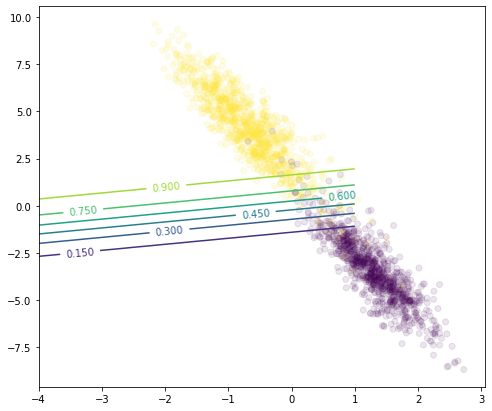

In [30]:
plt.figure(figsize=(8,7))
plt.scatter(plot_testing[:,0], plot_testing[:,1], alpha = 0.1, c = y_test.ravel())
contours = plt.contour(xg,yg,probability_contour)
plt.clabel(contours, inline = True );